
## Stacking, Ensembles with a meta-learner

### Types of ensembles

* Bagging: 
    * **Parallel** training of models for different subsets of the data (bootstrapping). **Simple averaging** or pooling of predictions.
* Boosting: 
    * **Sequential** training of models for samples previously misclassified. **Weighted averaging** of predictions.

Bagging and Boosting are usually applied to an ensemble of models belonging to the **same class**, e.g. fixed size Decision Trees.

* Stacking:
    * **Any variety of models** trained on the same task, e.g. Neural Networks, SVM and Random Forest. **Train a meta-model** to combine predictions.
    

In many situations we have multiple models and we want to integrate their predictions. How we combine them depends on the set of models. 

Bagging is the simplest way of creating ensembles, with the same model fitted to different data subsets (i.e. bootstrapping), and the predictions aggregated by simple averaging or the most common prediction.

Boosting is more advanced, iteratively training identical models (e.g. decision trees) on data samples that have been misclassified so far. Then it combines the predictions, weighting by prediction accuracy.

Stacking is a more general way of combining models. It combines any set of models and learns the best way to combine them through a meta-model.

### Stacking 

- Combine individual predictions through a second-level model

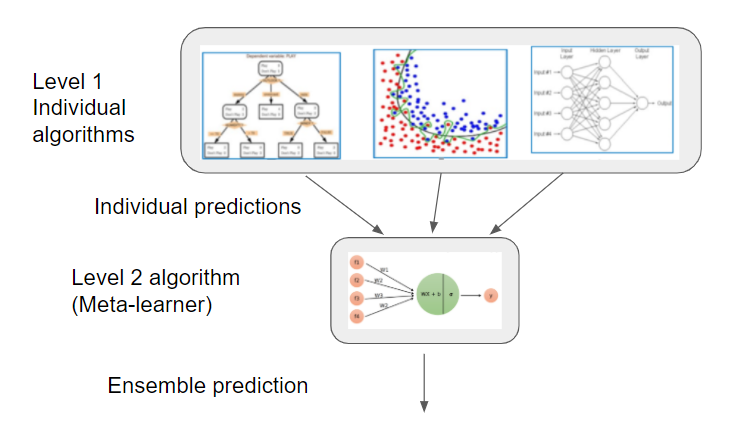

In benchmarks or in production, we may want to use all the models that have been trained, which can be of completely different families; anything to improve the final results!

First each individual model is trained normally, then the predictions are used to train a second-level model. This can be better than simple averaging, as there may be correlations or other structures between the predictions which may be exploited by this 'meta' model. The predictions of the individual models become the input features of a new model. 

Why should we try to build such Frankenstein models? If your goal is performance, and not the study of individual models, then it is a good way to use all the modelling power you can get your hands on, to improve your predictions. It is heavily used in Kaggle competitions or real-world applications where small performance gains are relevant, such as finance.

We can divide the Stacking algorithm into 4 steps.

### Step 1: Train individual models on task

Train multiple individual models for the task using different modeling approaches. The models can be from entirely different classes, such as random forests and neural networks. Variations within a model class can also be treated as distinct models, such as random forests with different numbers of leaves or neural networks with different numbers of layers. The models can also differ in terms of the learning hyperparameters used, including regularization strength, learning rate schedules, and number of training epochs. 

The key is to generate a diverse set of models that capture different representations and optimize different loss functions or objectives. Each model is trained independently on the same dataset. The predictions from this ensemble of distinct models can then be aggregated in various ways to produce an overall prediction. 

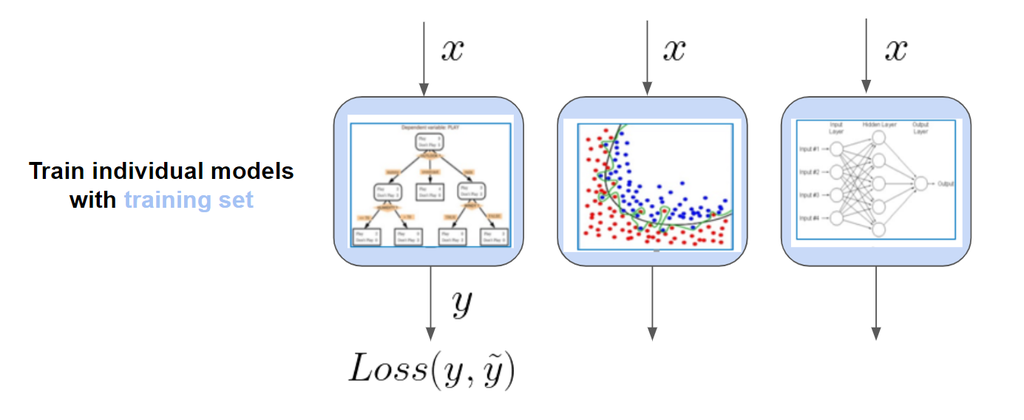

### Step 2: Joint predictions on validation set


Once the individual models have been trained, use them to get predictions for a different set of data - a validation set - that was not used in their training. It's crucial to use a separate data set as the individual models can overfit to their training data

If you have $N$ individual models, you get $N$ sets of predictions: $Y_1$ to $Y_N$ for each input data. These predictions need to be processed into a single prediction. Instead of getting the average of predictions to produce the final prediction, we can train an additional model.


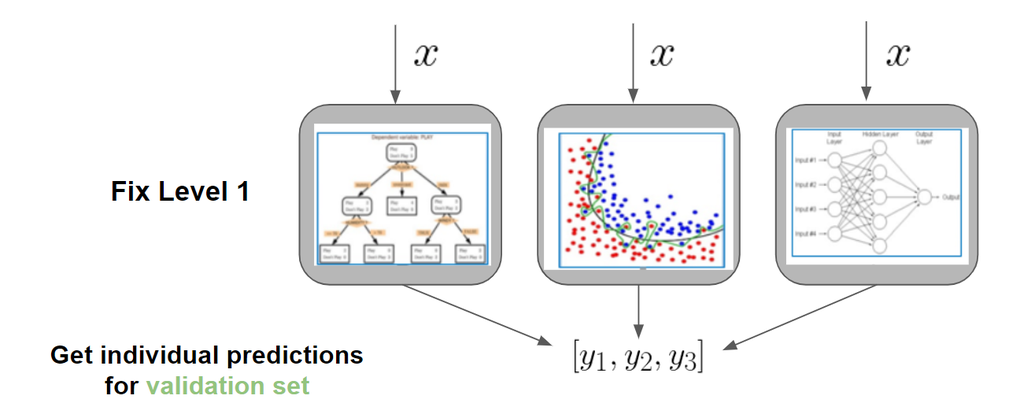

### Step 3: Train the meta-learner


In this step we use the predictions obtained from the ensemble of base models  as inputs to another model, the meta-learner. The role of the meta-learner is to distill the optimal predictions from the ensemble.

For regression tasks, a straightforward choice for the meta-learner is a linear regression model. It learns to assign varying weights to the level-1 models based on their prediction performance. Moreover, it addresses potential correlations in the predictions by adjusting the contributions of similar models.

Some types of predictions are not easily averaged, such as structured predictions, tabular, multivariate, and graphs. In these cases, specific models will be needed, such as a neural network.

One can also use more complex models for the second level, which may discover higher-order correlations in the predictions. For instance, some level-1 models might have better predictions for challenging samples, some for straightforward samples, which perhaps a decision tree could spot.

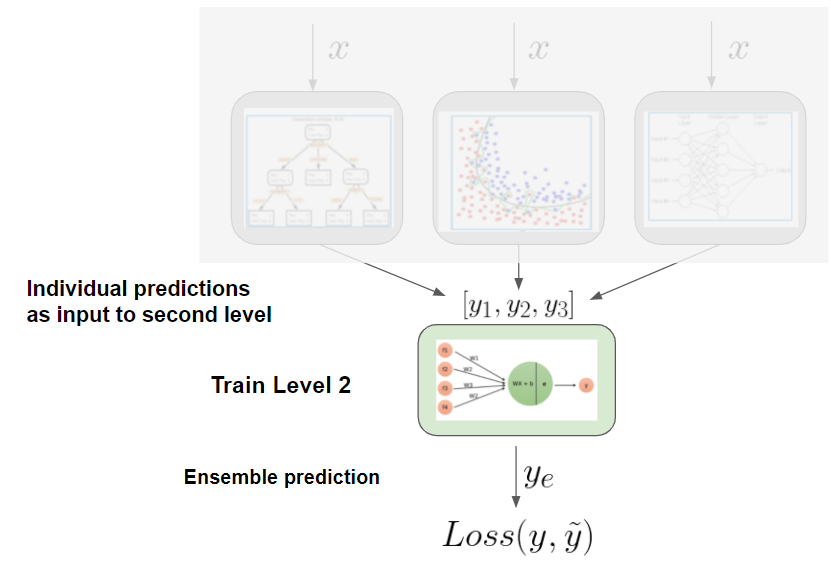

### Step 4: Validating the ensemble model 

Once we have our meta-learner trained, our ensemble model is ready. To get a prediction, use the two levels in sequence. 

To validate the performance of the model, we need to use yet another validation data set, that hasn't been used in any of the two training steps before.


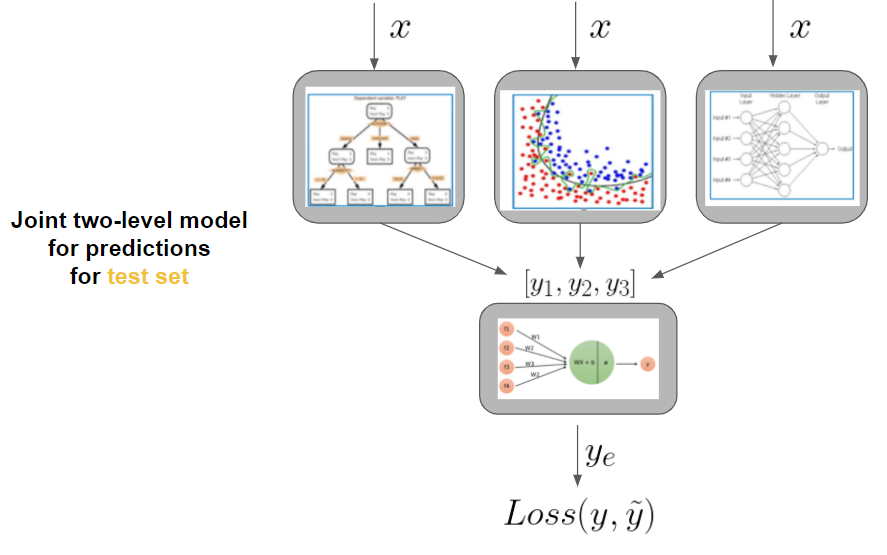

In the following, we introduce different cross-validation schemes for stacking models.

#### Simple two-level validation

The key is getting the cross-validation right. If the individual models were trained on some data, they will probably be overfitting them (training error is lower than testing error). If you use this data as input when training the second level, the second level will be receiving unusually good features (the training predictions) as inputs, and will not learn how to aggregate predictions for unseen data. 

The simplest and perhaps most common approach to cross-validating, is dividing your dataset in three subsets just once.

Usually for step 3, the meta-learner is simpler and needs less data than for level 1 training, i.e. it only needs enough data to train a linear regression model with $N$ input features, for $N$ models. 

This additional validation set creates a trade-off, as you will have less data to train your individual models. It may well be that this makes your ensemble worse than your best individual model trained on the complete training data.

In step 4, the second-level validation set size is the same as usual.

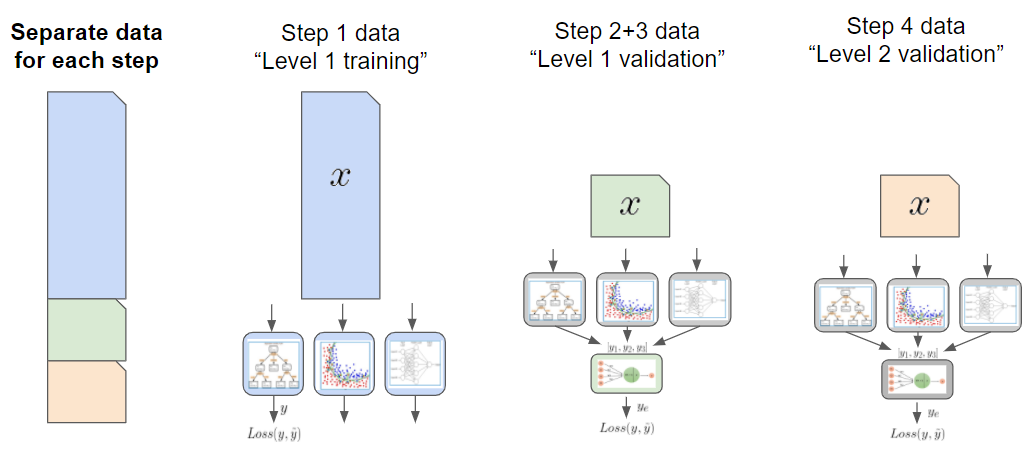

#### K-fold cross-validation training (Stacking)

By using the K-fold cross-validation split of the level-1 data, we can train $K$ different ensembles of level-1 models. For each of them, we collect the joint predictions for the respective validation subset. This way we end up with a joint prediction for every training data set, which is then used to train the meta-learner in step 3. 

After step 3 there is an additional step, of training the level-1 models on the whole training data, to be included in the step 4 final ensemble model.

As an obvious downside to this more complicated algorithm, one needs to train the level-1 models $K+1$ times, which may be prohibitive. But it is a clever way of using the whole training data for both levels.

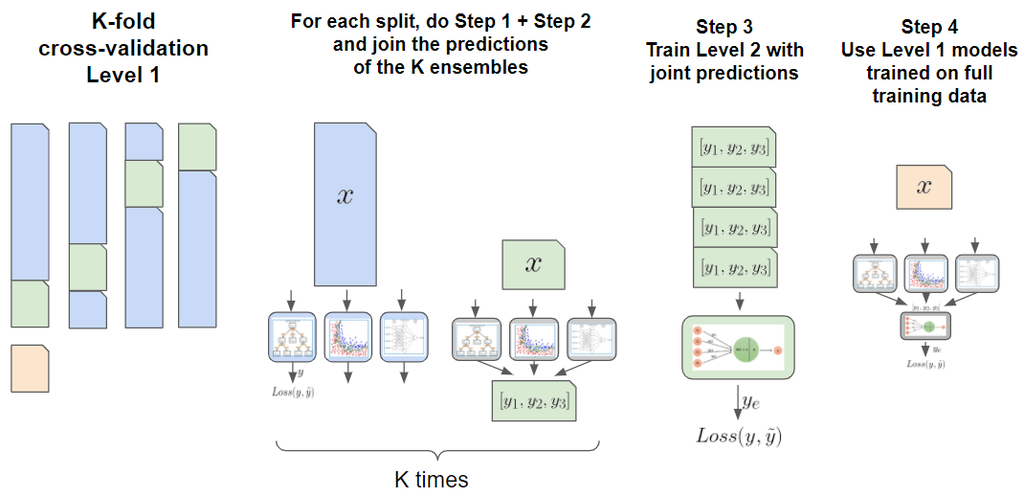

#### Two level K-fold cross-validation

Now we can go all the way, and use K-fold cross-validation for level 2 also. This way we use the whole data set for training. It avoids losing too much data for the validation sets. On the other hand, on needs to train each model $K1 * K2$ times (K for levels 1 and 2).

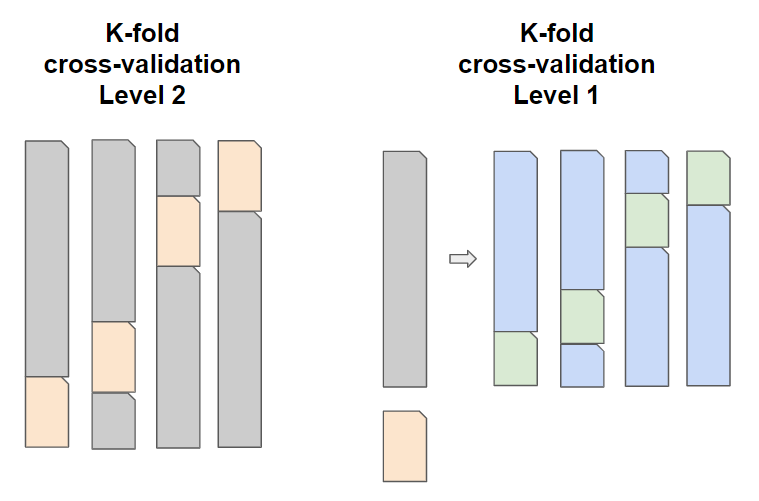

#### Two-level ensembles

One can also add a second level of Stacking. It makes sense when one uses different families of meta-learners for level 2, e.g. a linear model and a neural network, and want to join their results. For each new level, a new level of cross-validation is needed.

In theory, one can make as many levels as one wants. But in practice, two levels will be more than enough for real-world settings.

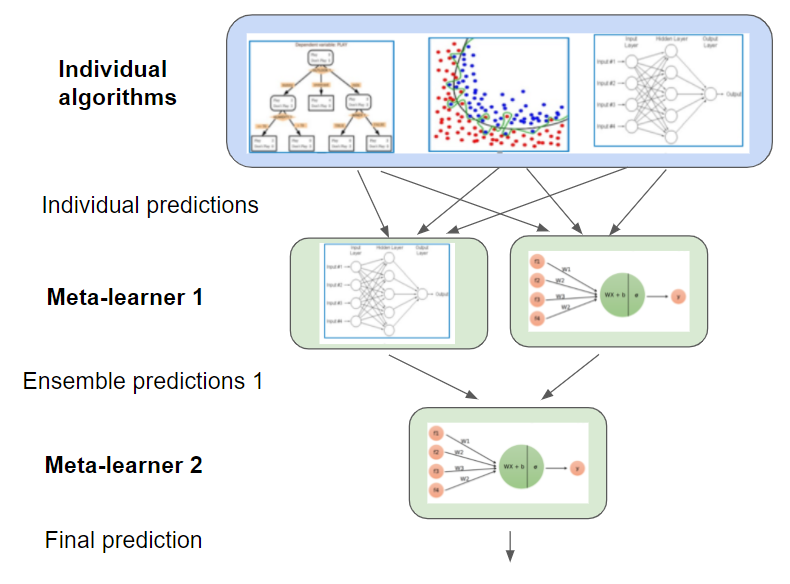

### Example: Blending in Netflix Prize for Recommender Systems

* Thorough ensemble development won them the $\$1$ million prize (USD)
* Large variety of Recommender Systems models, including Nearest Neighbors (KNN), Restricted Boltzmann Machines (RBM), Matrix Factorization (SVD) and Neural Networks
* Used residual training: stop the training loop of individual models when it stops improving the ensemble predictions

A modified version of Stacking was used by the Netflix Challenge winner. The winning team, named BellKor’s Pragmatic Chaos, was a partnership of three teams, and one of their key tactics was to train a huge number of models of different kinds, and ensemble them with meta-learners. They won $1,000,000 with their ensemble model!

It is an excellent example of the power of ensembles, as they used huge variety of individual models, including nearest neighbors, hand-tuned models, restricted boltzmann machines, and matrix factorization. They reported how some models, such as restricted boltzmann machines, were not great predictors by themselves, but complemented well by predicting samples that the others got wrong.

They started with linear stacking models (they call it Blending instead of Stacking), but also tried neural networks and polynomial functions. Later they even collected these different ensembles into a stronger two layer meta-learner, that used the predictions of the ensembles with different meta-learners.

Though they used ensembles with more than 200 individual models, in practice an ensemble of a dozen of the best ones were enough for near-top performance.

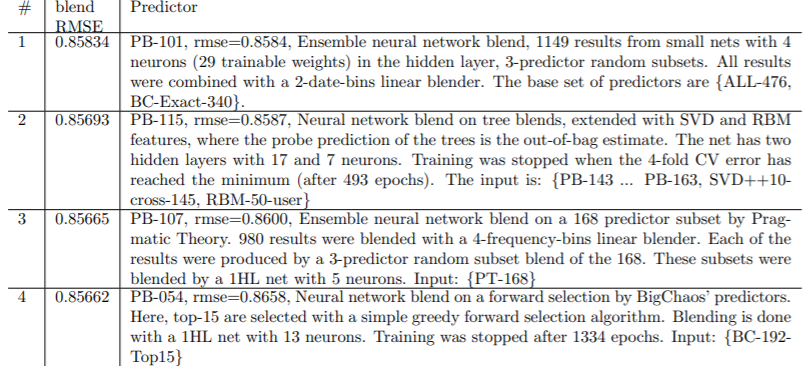

<center><a href="https://www.researchgate.net/profile/Michael_Jahrer/publication/223460749_The_BigChaos_Solution_to_the_Netflix_Grand_Prize/links/0fcfd5108322324b0d000000.pdf" style="text-align:center">The BigChaos Solution to the Netflix Grand Prize</a></center>
